In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import numpy as np

In [2]:
#load mitgcm output where \kappa_{redi}=50
datadir='tracers_mod_LGM/diffusion_50'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2','layersDiags','dyn','gm']
dslayers=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid = xgcm.Grid(dslayers, periodic=['X'])
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [dslayers[name] for name in names]
all_tracers50 = xr.concat(all_tracer_list, dim='tracer')

In [3]:
#load mitgcm output where \kappa_{redi}=500
datadir='tracers_mod_LGM/diffusion_500'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2','dyn']
ds500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds500[name] for name in names]
all_tracers500 = xr.concat(all_tracer_list, dim='tracer')

In [4]:
#load mitgcm output where \kappa_{redi}=5000
datadir='tracers_mod_LGM/diffusion_5000'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds5000[name] for name in names]
all_tracers5000 = xr.concat(all_tracer_list, dim='tracer')

In [5]:
datadir='tracers_mod_LGM/LGM50'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','layersDiags','dyn','tracer2','gm']
dslayers1=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dslayers1, periodic=['X'])
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [dslayers1[name] for name in names]
all_tracersLGM50 = xr.concat(all_tracer_list, dim='tracer')

In [7]:
datadir='tracers_mod_LGM/LGM500'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','layersDiags','dyn','tracer2']#
dsLGM500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM500, periodic=['X'])
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [dsLGM500[name] for name in names]
all_tracersLGM500 = xr.concat(all_tracer_list, dim='tracer')

In [8]:
datadir='tracers_mod_LGM/LGM5000'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','layersDiags','dyn','tracer2']#
dsLGM5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM5000, periodic=['X'])
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [dsLGM5000[name] for name in names]
all_tracersLGM5000 = xr.concat(all_tracer_list, dim='tracer')

In [9]:
layers_depth_pac1 = (grid.cumsum((dslayers.LaHs1RHO*dslayers.dxG).mean('time').where(dslayers.XC<140).sum('XC')/dslayers.dxG.where(dslayers.XC<140).sum('XC'), '1RHO',         
                                    boundary='fill').load())
layers_depth_atl1=(grid.cumsum((dslayers.LaHs1RHO*dslayers.dxG).mean('time').where(dslayers.XC>140).sum('XC')/dslayers.dxG.where(dslayers.XC>140).sum('XC'), '1RHO', 
                                  boundary='fill').load())
layers_depth1=grid.cumsum(dslayers.LaHs1RHO.mean('time').mean('XC'), '1RHO', boundary='fill').load()
layers_depth_atlmix1=xr.concat([layers_depth1[:,0:36], layers_depth_atl1[:,36:144]],'YG')
layers_depth_pacmix1=xr.concat([layers_depth1[:,0:36], layers_depth_pac1[:,36:144]],'YG')
layers_depth_pacmix1=layers_depth_pacmix1.where(xr.ufuncs.isfinite(layers_depth_pacmix1),0)
layers_depth_atlmix1=layers_depth_atlmix1.where(xr.ufuncs.isfinite(layers_depth_atlmix1),0)
#layers_depth_pacmix1=layers_depth_pacmix1.where((layers_depth_pacmix1>0)|((layers_depth_pacmix1.layer_1RHO_bounds<34)|(layers_depth_pacmix1.YG<-60)), 4000)
#layers_depth_atlmix1=layers_depth_atlmix1.where((layers_depth_atlmix1>0)|((layers_depth_atlmix1.layer_1RHO_bounds<34)|(layers_depth_atlmix1.YG<-60)), 4000)

In [10]:
layers_depth_pac2 = (grid2.cumsum((dslayers1.LaHs1RHO*dslayers1.dxG).mean('time').where(dslayers1.XC<140).sum('XC')/dslayers1.dxG.where(dslayers1.XC<140).sum('XC'), '1RHO',         
                                    boundary='fill').load())
layers_depth_atl2=(grid2.cumsum((dslayers1.LaHs1RHO*dslayers1.dxG).mean('time').where(dslayers1.XC>140).sum('XC')/dslayers1.dxG.where(dslayers1.XC>140).sum('XC'), '1RHO', 
                                  boundary='fill').load())
layers_depth2=grid2.cumsum(dslayers1.LaHs1RHO.mean('time').mean('XC'), '1RHO', boundary='fill').load()
layers_depth_atlmix2=xr.concat([layers_depth2[:,0:36], layers_depth_atl2[:,36:144]],'YG')
layers_depth_pacmix2=xr.concat([layers_depth2[:,0:36], layers_depth_pac2[:,36:144]],'YG')
layers_depth_pacmix2=layers_depth_pacmix2.where(xr.ufuncs.isfinite(layers_depth_pacmix2),0)
layers_depth_atlmix2=layers_depth_atlmix2.where(xr.ufuncs.isfinite(layers_depth_atlmix2),0)
#layers_depth_pacmix2=layers_depth_pacmix2.where((layers_depth_pacmix2>0)|((layers_depth_pacmix2.layer_1RHO_bounds<34)|(layers_depth_pacmix2.YG<-60)), 4000)
#layers_depth_atlmix2=layers_depth_atlmix2.where((layers_depth_atlmix2>0)|((layers_depth_atlmix2.layer_1RHO_bounds<34)|(layers_depth_atlmix2.YG<-60)), 4000)

In [11]:
ROC_pac1=grid.cumsum((dslayers.LaVH1RHO[:,:,:,0:139]*dslayers.dxG[:,0:139]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_atl1=grid.cumsum((dslayers.LaVH1RHO[:,:,:,140:215]*dslayers.dxG[:,140:215]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_tot1=grid.cumsum((dslayers.LaVH1RHO*dslayers.dxG).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_pac2=grid2.cumsum((dslayers1.LaVH1RHO[:,:,:,0:139]*dslayers1.dxG[:,0:139]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_atl2=grid2.cumsum((dslayers1.LaVH1RHO[:,:,:,140:215]*dslayers1.dxG[:,140:215]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_tot2=grid2.cumsum((dslayers1.LaVH1RHO*dslayers1.dxG).mean('time').sum('XC'),'1RHO',boundary='fill').load()

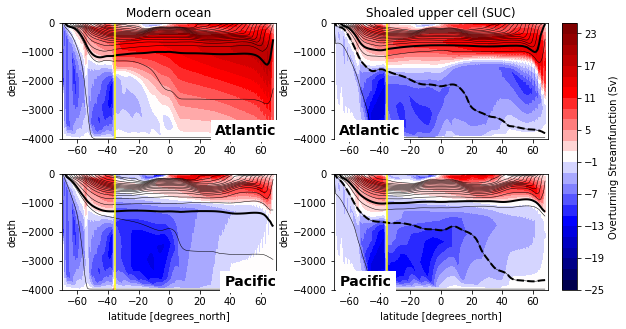

In [12]:
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
#layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0073,0.4,0.2),colors='black',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Modern ocean')
ax=plt.gca()
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
b = ROC_pac1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix1
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_pac1)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
#layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0073,0.4,0.2),colors='black',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dslayers1.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Shoaled upper cell (SUC)')
ax=plt.gca()
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
b = ROC_pac2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix2
im=(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dslayers1.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_pac2)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='Overturning Streamfunction (Sv)')
fig.savefig('ROC_modern_LGM.pdf', bbox_inches='tight')

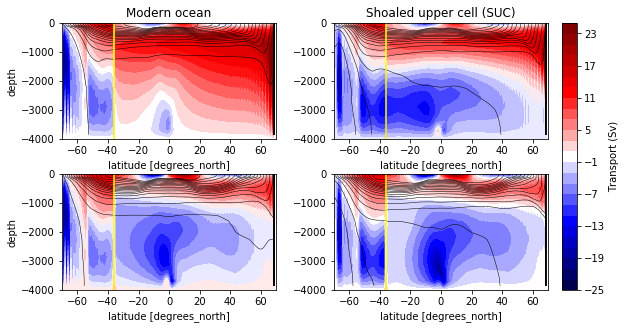

In [13]:
#Eulerian overturning
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b=9.81*(2*10**-4*dslayers.THETA-7.4*10**-4*(dslayers.SALT-35))
OT_atl=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
(Eul_atl/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), 
                              cmap='seismic',add_colorbar=False)
b[0,:,:,141:-1].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)

ax = plt.gca()
ax.set_title('Modern ocean')
ax.axvline(-36,color='yellow')
ax.set_ylabel('depth')

plt.subplot(2, 2, 3)
(Eul_pac/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                             cmap='seismic',add_colorbar=False)
b[0,:,:,:140].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_ylabel('depth')
ax.set_title('')

plt.subplot(2, 2, 2)
b=9.81*(2*10**-4*dslayers1.THETA-7.4*10**-4*(dslayers1.SALT-35))

OT_atl=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
(Eul_atl/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                             cmap='seismic',add_colorbar=False)
b[0,:,:,141:-1].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_title('Shoaled upper cell (SUC)')
ax.set_ylabel('')

plt.subplot(2, 2, 4)
im=(Eul_pac/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                                cmap='seismic',add_colorbar=False)
b[0,:,:,:140].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_ylabel('')
ax.set_title('')

fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='Transport (Sv)')
fig.savefig('overturning_depth.pdf', bbox_inches='tight')

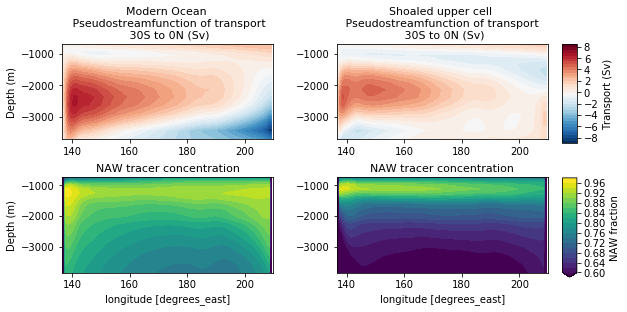

In [14]:

fig, ax = plt.subplots(2,2,figsize=(10,6))
((ds500.WVEL[0,16:,41:72,137:]*ds500.rA[41:72,137:]).sum('YC').cumsum('XC')/10**6).plot.contourf(ax=ax[0,0],levels=np.arange(-9,9,0.5),add_colorbar=False)
ax[0,0].set_xlim(136.5,210)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Depth (m)')
ax[0,0].set_title('Modern Ocean \n Pseudostreamfunction of transport\n 30S to 0N (Sv)', fontsize=11)
ds500.TRAC01[0,16:,41:72,137:].mean('YC').plot.contourf(ax=ax[1,0],levels=np.arange(0.6,1,0.02),add_colorbar=False)
ax[1,0].set_title('NAW tracer concentration', fontsize=11)
ax[1,0].set_xlim(136.5,210)
ax[1,0].set_ylabel('Depth (m)')
im=((dsLGM500.WVEL[0,16:,41:72,137:]*ds500.rA[41:72,137:]).sum('YC').cumsum('XC')/10**6).plot.contourf(ax=ax[0,1],levels=np.arange(-9,9,0.5),add_colorbar=False)

ax[0,1].set_xlim(136.5,210)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_title('Shoaled upper cell \n Pseudostreamfunction of transport \n 30S to 0N (Sv)', fontsize=11)
im2=dsLGM500.TRAC01[0,16:,41:72,137:].mean('YC').plot.contourf(ax=ax[1,1],levels=np.arange(0.6,1,0.02),add_colorbar=False)
ax[1,1].set_xlim(136.5,210)
ax[1,1].set_title('NAW tracer concentration', fontsize=11)
ax[1,1].set_ylabel('')
fig.subplots_adjust(hspace=0.4, wspace=0.3,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.65, 0.02, 0.23])
fig.colorbar(im, cax=cbar_ax,label='Transport (Sv)')
cbar_ax = fig.add_axes([0.82, 0.34, 0.02, 0.23])
fig.colorbar(im2, cax=cbar_ax,label='NAW fraction')
fig.savefig('zonal_view.pdf', bbox_inches='tight')

/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


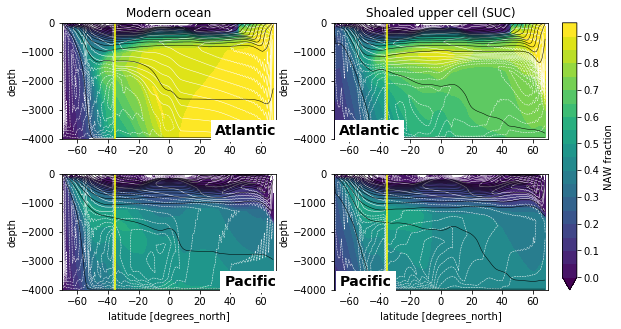

In [25]:
buoy500=9.81*(2*10**-4*ds500.THETA-7.4*10**-4*(ds500.SALT-35))
baxis=(-9.81*(ds500.layer_1RHO_bounds-35)/1035).values[::-1]


tracer_500 = layers_apply(ds500.TRAC01.mean('time'), buoy500.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')
zeta_500 = layers_apply(xr.ones_like(ds500.TRAC01.mean('time')), buoy500.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')



fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_500/zeta_500)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Modern ocean')
ax=plt.gca()
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
b = ROC_pac1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix1
c=(tracer_500/zeta_500)[:,:140,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,:140,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_pac1)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))#

buoy500=9.81*(2*10**-4*dslayers1.THETA-7.4*10**-4*(dslayers1.SALT-35))
baxis=np.insert(np.insert((-9.81*(dslayers1.layer_1RHO_bounds-35)/1035).values[::-1],0,0,axis=0),0,-0.01,axis=0)



tracer_500 = layers_apply(dsLGM500.TRAC01.mean('time'), buoy500.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')
zeta_500 = layers_apply(xr.ones_like(dslayers1.TRAC01.mean('time')), buoy500.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')



plt.subplot(2, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_500/zeta_500)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)

(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers1.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Shoaled upper cell (SUC)')
ax=plt.gca()
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
b = ROC_pac2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix2
c=(tracer_500/zeta_500)[:,:140,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,:140,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

im=c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers1.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_pac2)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)

plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
fig.savefig('tracers_modern_LGM.pdf', bbox_inches='tight')

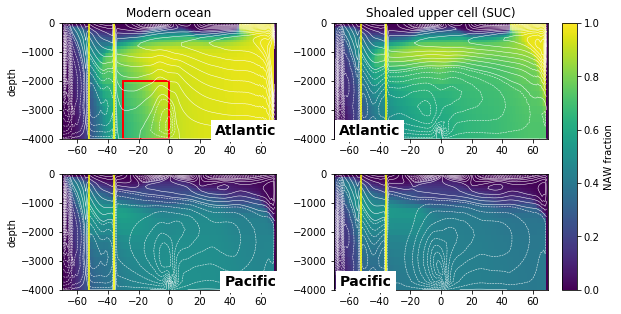

In [16]:
#Eulerian tracers
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
OT_atl=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).rolling(YG=2).mean().load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).rolling(YG=2).mean().load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).rolling(YG=2).mean().load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_atl=(ds500.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
p = plt.Rectangle((-30, -4000), 30, 2000, fill=False, ec='r',lw=2)
ax.add_patch(p)
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.set_title(r'Modern ocean')
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_pac=(ds500.TRAC01)[0,:,:,0:140].mean('XC')
TRAC1_pac.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_pac/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_pac/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax = plt.gca()
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 2)
OT_atl=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).rolling(YG=2).mean().load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).rolling(YG=2).mean().load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).rolling(YG=2).mean().load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_atlLGM=(dsLGM500.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atlLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC)')
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_pacLGM=(dsLGM500.TRAC01)[0,:,:,:140].mean('XC')
im=TRAC1_pacLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_pac/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_pac/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)

ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
fig.savefig('tracers_500_depth.pdf', bbox_inches='tight')

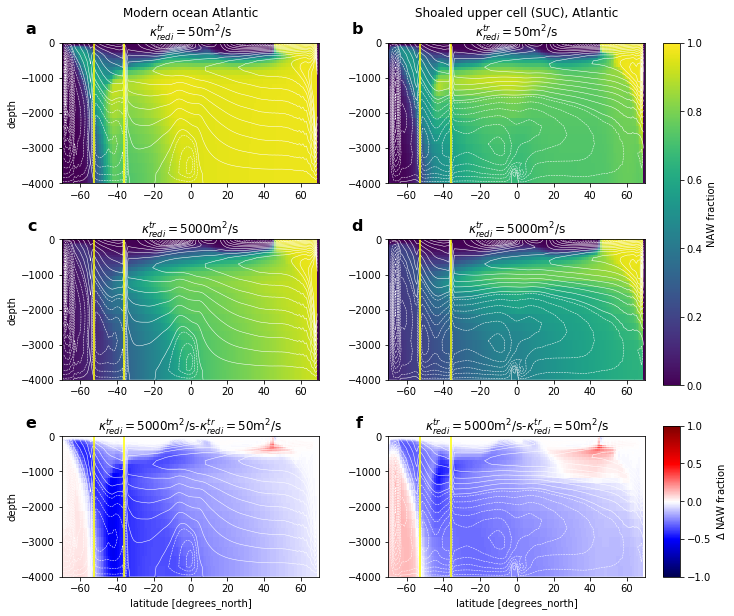

In [17]:
#Eulerian tracers
fig = plt.figure(figsize=(12,14))
plt.subplot(3, 2, 1)
OT_atl=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((dslayers.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(dslayers.GM_PsiY*dslayers.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).rolling(YG=2).mean().load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).rolling(YG=2).mean().load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).rolling(YG=2).mean().load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_atl=(dslayers.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.set_title(r'Modern ocean Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3, 2, 3)
TRAC1_atl2=(ds5000.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl2.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax = plt.gca()
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 5)
(TRAC1_atl2-TRAC1_atl).plot(vmin=-1,vmax=1,rasterized=True,cmap='seismic',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('depth')
ax.set_title('')
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 2)
OT_atl=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((dslayers1.VVEL*dslayers.drF*dslayers.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(dslayers1.GM_PsiY*dslayers.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).rolling(YG=2).mean().load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).rolling(YG=2).mean().load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).rolling(YG=2).mean().load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_atlLGM=(dslayers1.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atlLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC), Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 4)
TRAC1_atl2LGM=(dsLGM5000.TRAC01)[0,:,:,140:].mean('XC')
im=TRAC1_atl2LGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 6)
im2=(TRAC1_atl2LGM-TRAC1_atlLGM).plot(vmin=-1,vmax=1,rasterized=True,cmap='seismic',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


fig.subplots_adjust(hspace=0.4, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.54, 0.02, 0.34])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.15])
fig.colorbar(im2, cax=cbar_ax,label='$\Delta$ NAW fraction')
fig.savefig('uniform_isopycnal_mixing.pdf', bbox_inches='tight')

/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


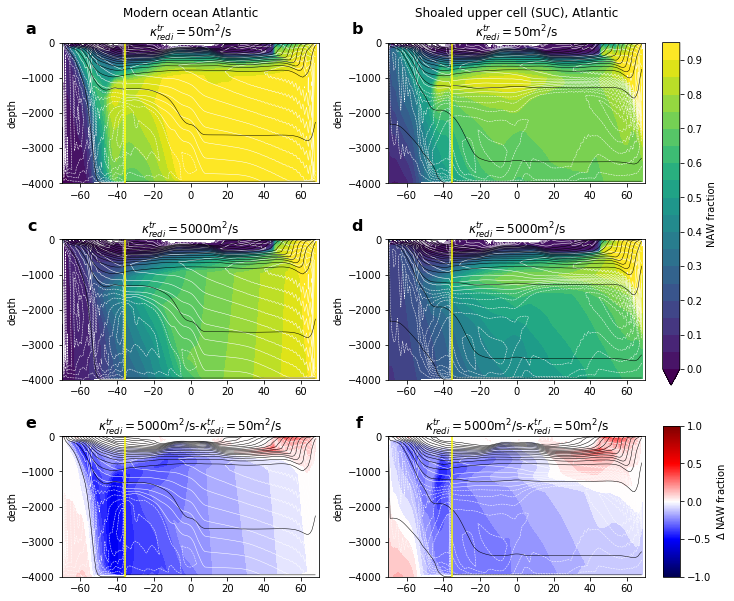

In [42]:
#Density tracers
buoy50=9.81*(2*10**-4*dslayers.THETA-7.4*10**-4*(dslayers.SALT-35))
baxis=(-9.81*(dslayers.layer_1RHO_bounds-35)/1035).values[::-1]

tracer_50 = layers_apply(dslayers.TRAC01.mean('time'), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(dslayers.TRAC01.mean('time')), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')

tracer_5000 = layers_apply(ds5000.TRAC01.mean('time'), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')
zeta_5000 = layers_apply(xr.ones_like(dslayers.TRAC01.mean('time')), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')

fig = plt.figure(figsize=(12,14))
plt.subplot(3, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_50[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.set_title(r'Modern ocean Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3, 2, 3)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_5000/zeta_5000)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 5)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_5000/zeta_5000-tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='seismic',levels=np.arange(-1,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


buoy50=9.81*(2*10**-4*dslayers1.THETA-7.4*10**-4*(dslayers1.SALT-35))
baxis=(-9.81*(dslayers1.layer_1RHO_bounds-35)/1035).values[::-1]

tracer_50 = layers_apply(dslayers1.TRAC01.mean('time'), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(dslayers1.TRAC01.mean('time')), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')

tracer_5000 = layers_apply(dsLGM5000.TRAC01.mean('time'), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')
zeta_5000 = layers_apply(xr.ones_like(dslayers.TRAC01.mean('time')), buoy50.mean('time'), baxis, dslayers.drF, dslayers.drC, 10, 'Z', 'Tlev')

plt.subplot(3, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_50[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC), Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 4)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_5000/zeta_5000)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 6)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_5000/zeta_5000-tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='seismic',levels=np.arange(-1,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dslayers.layer_1RHO_bounds-35)/1035, dslayers.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


fig.subplots_adjust(hspace=0.4, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.54, 0.02, 0.34])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.15])
fig.colorbar(im2, cax=cbar_ax,label='$\Delta$ NAW fraction')
fig.savefig('uniform_isopycnal_dens.pdf', bbox_inches='tight')

/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/ipykernel/__main__.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/ipykernel/__main__.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


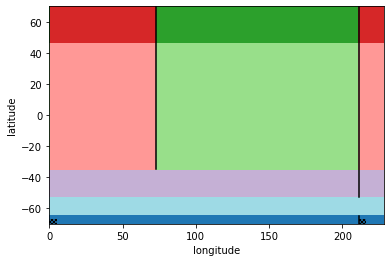

In [66]:
nx=216
ny=144
nz=32
fname='tracers_mod_LGM/tracer_areas/tracerAAn.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerAPn.bin'
ds1=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerBA.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerBP.bin'
ds3=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerMAn.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerMPn.bin'
ds5=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerNA.bin'
ds7=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerNP.bin'
ds8=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerTA.bin'
ds9=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerTP.bin'
ds10=np.fromfile(fname,dtype='>f')
ds=ds1*0.01+ds5+ds3*0.46+ds9*0.38+ds7*0.33+ds10*0.28+ds8*0.23
ds[ds==0]=np.nan
land=np.reshape(ds,(nz,ny,nx))
land=np.transpose(land,(1,2,0))
indices=list(np.arange(140,215))+list(np.arange(0,140))+list(np.arange(140,160))
ax=plt.pcolor(np.linspace(0,210+0.97*19,235),np.linspace(-70,70,144),land[:,indices,1],cmap='tab20',rasterized=True)
#plt.colorbar(ax)
plt.plot((73,73), (-35, 70), 'k-')
plt.plot((211,211), (-52.5, 70), 'k-')
plt.plot((211,211), (-70, -65), 'k-')
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
errorboxes = []
rect = Rectangle((211,-70), 5, 3,hatch='xxxxxx',facecolor='None')
ax2 = plt.axes()
ax2.add_patch(rect)
rect = Rectangle((0,-70), 5, 3,hatch='xxxxxx',facecolor='None')
ax2 = plt.axes()
ax2.add_patch(rect)
plt.xlabel('longitude')
plt.ylabel('latitude')
land[10,10,1]
fig = plt.gcf()
fig.savefig('7boxes.pdf', bbox_inches='tight')